In [1]:
feature_names_2jets_VBF = ['Zeppenfeld_DeltaEta', 'met', 'DeltaEta_e_m', 'empt', 'j1pt', 'DeltaEta_j1_j2', 'j1_j2_mass', 'Ht_had', 'Rpt', 'j2pt', 'pt_cen_Deltapt']

features_lists = [feature_names_2jets_VBF]
ncats = 1

In [130]:
features_map_vbf = {
    "mva": ['BDT Discriminator', 25, 0, 1],
    "e_m_Mass": ['$m_{e\mu}$ [GeV]', 50, 110, 160],
    "met": ['$E^{miss}_{T}$ [GeV]', 25, 0, 200],
    "eEta": ['$\eta^{e}$', 30, -2.5, 2.5],
    "year": ['Year', 5, 0, 5],
    "mEta": ['$\eta^{\mu}$', 30, -2.5, 2.5],
    "mpt": ['$p_{T}^{\mu}$', 54, 26, 80], 
    #"mpt": ['$p_{T}^{\mu}$', 30, 26, 200], 
    "ept": ['$p_{T}^{e}$', 30, 24, 200], 
    "mpt_Per_e_m_Mass": ['$p_{T}^{\mu}/m_{e\mu}$', 30, 0.15, 1], 
    "ept_Per_e_m_Mass": ['$p_{T}^{e}/m_{e\mu}$', 30, 0.15, 1], 
    "empt": ['$p_{T}^{e\mu}$ [GeV]', 25, 0, 150],
    "emEta": ['$\eta^{e\mu}$', 30, -6, 6], 
    "DeltaEta_e_m": ['$\Delta \eta[e, \mu]$', 25, 0, 3.5], 
    "DeltaPhi_e_m": ['$\Delta \phi[e, \mu]$', 30, 0, 3.2], 
    "DeltaPhi_em_met": ['$\Delta \phi[e\mu, MET]$', 25, 0, 3.2], 
    "DeltaR_e_m": ['$\Delta R[e, \mu]$', 30, 0, 4.5], 
    "e_met_mT": ['$m_{T}[e, MET]$', 30, 0, 250], 
    "m_met_mT": ['$m_{T}[\mu, MET]$', 30, 0, 250], 
    "pZeta85": ['$p_{\zeta}$ [GeV]', 50, -150, 150], 
    "pZeta15": ['$p_{\zeta}$ [GeV]', 30, -200, 100], 
    "pZeta": ['$p_{\zeta}$ [GeV]', 30, -200, 100], 
    "pZetaVis": ['$p^{vis}_{\zeta}$ [GeV]', 550, -200, 350],
    "j1pt": ['$p_{T}^{j_{1}}$ [GeV]', 25, 30, 250], 
    "j1Eta": ['$\eta^{j_{1}}$', 25, -5, 5], 
    "DeltaEta_j1_em": ['$\Delta \eta[j_{1}, e\mu]$', 25, 0, 6], 
    "DeltaPhi_j1_em": ['$\Delta \phi[j_{1}, e\mu]$', 32, 0, 3.2], 
    "DeltaR_j1_em": ['$\Delta R[j_{1}, e\mu]$', 80, 0, 8],
    "j2pt": ['$p_{T}^{j_{2}}$ [GeV]', 25, 30, 120], 
    "j2Eta": ['$\eta^{j_{2}}$', 25, -5, 5], 
    "j1_j2_mass": ['$m_{j_{1}j_{2}}$ [GeV]', 25, 400, 1500], 
    "DeltaEta_em_j1j2": ['$\Delta \eta[j_{1}j_{2}, e\mu]$', 20, 0, 6], 
    "DeltaPhi_em_j1j2": ['$\Delta \phi[j_{1}j_{2}, e\mu]$', 32, 0, 3.2], 
    "DeltaR_em_j1j2": ['$\Delta R[j_{1}j_{2}, e\mu]$', 70, 0, 7], 
    "DeltaEta_j2_em": ['$\Delta \eta[j_{2}, e\mu]$', 25, 0, 5], 
    "DeltaPhi_j2_em": ['$\Delta \phi[j_{2}, e\mu]$', 32, 0, 3.2], 
    "DeltaR_j2_em": ['$\Delta R[j_{2}, e\mu]$', 70, 0, 7], 
    "DeltaEta_j1_j2": ['$\Delta \eta[j_{1}, j_{2}]$', 25, 2.5, 8], 
    "DeltaPhi_j1_j2": ['$\Delta \phi[j_{1}, j_{2}]$', 30, 0, 3.2], 
    "DeltaR_j1_j2": ['$\Delta R[j_{1}, j_{2}]$', 30, 0, 7], 
    "Zeppenfeld": ['$\eta^{e\mu}-(\eta^{j_{1}}+\eta^{j_{2}})/2$', 25, -5, 5], 
    "Zeppenfeld_DeltaEta": [r'Zeppenfeld variable', 25, -1.5, 1.5], 
    "absZeppenfeld_DeltaEta": ['', 100, -5, 5], 
    "cen": ['', 25, 0, 1.2], 
    "Rpt": ['$R_{p_{T}}$', 25, 0, 0.8], 
    "pt_cen": ['', 100, 0, 1], 
    "pt_cen_Deltapt": [r'$p_{T}$-centrality', 25, 0, 1.5], 
    "abspt_cen_Deltapt": ['', 100, 0, 1], 
    "Ht_had": ['$H_{T}$ [GeV]', 25, 60, 600], 
    "Ht": ['$H_{T}$ [GeV]', 50, 0, 600],  
    "njets": ['Number of jets', 10, 0, 10],
}

In [3]:
from coffea.util import load
import numpy as np
import pandas as pd
import glob, os, json, argparse
years = ['2016preVFP','2016postVFP','2017','2018']
var_dict = [{}, {}, {}]
df = []
for year in years:
    print(f'Processing {year}')
    result = load(f"../results/{year}/makeDF/output_WJet2.coffea")
    if isinstance(result,tuple):
        result = result[0]
    for varName in result:
        for i in range(3):
            if f'{i}jets' in varName:
                if varName.replace(f'_{i}jets','') in var_dict[i]:
                    var_dict[i][varName.replace(f'_{i}jets','')] = np.append(var_dict[i][varName.replace(f'_{i}jets','')],result[varName].value)
                else:
                    var_dict[i][varName.replace(f'_{i}jets','')] = result[varName].value
for i in range(3):
    df.append(pd.DataFrame(var_dict[i]))
    df[-1]['ept'] = df[-1]["ept_Per_e_m_Mass"]*df[-1]["e_m_Mass"]
    df[-1]['mpt'] = df[-1]["mpt_Per_e_m_Mass"]*df[-1]["e_m_Mass"]

Processing 2016preVFP
Processing 2016postVFP
Processing 2017
Processing 2018


In [129]:
print(df[2].columns)

Index(['opp_charge', 'is2016preVFP', 'is2016postVFP', 'is2017', 'is2018',
       'sample', 'label', 'weight', 'njets', 'e_m_Mass', 'e_m_Mass_reso',
       'e_m_Mass_ereso', 'e_m_Mass_mreso', 'lepCos', 'e_deltaE', 'm_deltapT',
       'met', 'eEta', 'mEta', 'mpt_Per_e_m_Mass', 'ept_Per_e_m_Mass', 'empt',
       'emEta', 'DeltaEta_e_m', 'DeltaR_e_m', 'DeltaPhi_e_met',
       'DeltaPhi_m_met', 'DeltaPhi_em_met', 'j1pt', 'j1Eta', 'DeltaEta_j1_em',
       'DeltaR_j1_em', 'isVBFcat', 'j2pt', 'j2Eta', 'j1_j2_mass',
       'DeltaEta_em_j1j2', 'DeltaR_em_j1j2', 'DeltaEta_j2_em', 'DeltaR_j2_em',
       'DeltaEta_j1_j2', 'DeltaR_j1_j2', 'Zeppenfeld', 'Zeppenfeld_DeltaEta',
       'cen', 'Rpt', 'pt_cen', 'pt_cen_Deltapt', 'Ht_had', 'ept', 'mpt'],
      dtype='object')


In [108]:
data_cuts_os = []
massRange = ((df[2]['e_m_Mass']>110)&(df[2]['e_m_Mass']<160))
typeofSamples = ((df[2]['label']==0) | (df[2]['label']==3))
data_cuts_os.append(df[2][((massRange & typeofSamples) | (df[2]['label']==1)) & (df[2]['isVBFcat']==1) & (df[2]['opp_charge']==1)])

In [109]:
data_cuts_ss = []
massRange = ((df[2]['e_m_Mass']>110)&(df[2]['e_m_Mass']<160))
typeofSamples = ((df[2]['label']==0) | (df[2]['label']==3))
data_cuts_ss.append(df[2][massRange & typeofSamples & (df[2]['isVBFcat']==1) & (df[2]['opp_charge']!=1)])

In [110]:
data_cuts_os = [data_cuts_os[-1]]
data_cuts_ss = [data_cuts_ss[-1]]

In [131]:
#Load and predict from model
import xgboost as xgb
model_names = ["results/model_VBF.json"]
for i in range(ncats):
    print(i)
    model_out_file = model_names[i]
    model_load = xgb.XGBClassifier()
    model_load.load_model(model_out_file)
    data_cuts_os[i]['mva'] = model_load.predict_proba(data_cuts_os[i][features_lists[i]])[:,1]
    data_cuts_ss[i]['mva'] = model_load.predict_proba(data_cuts_ss[i][features_lists[i]])[:,1]
    data_cuts_os[i]['year'] = data_cuts_os[i]['is2016postVFP'] + data_cuts_os[i]['is2017']*2 + data_cuts_os[i]['is2018']*3
    data_cuts_ss[i]['year'] = data_cuts_ss[i]['is2016postVFP'] + data_cuts_ss[i]['is2017']*2 + data_cuts_ss[i]['is2018']*3

0


/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [112]:
data_cuts_os[0] = data_cuts_os[0][  (data_cuts_os[0]['mva'] > 0.747096836566925) & (data_cuts_os[0]['mva'] < 0.8933777213096619)]  
data_cuts_ss[0] = data_cuts_ss[0][  (data_cuts_ss[0]['mva'] > 0.747096836566925) & (data_cuts_ss[0]['mva'] < 0.8933777213096619)]  

In [132]:
data_cuts_os[0] = data_cuts_os[0][  (data_cuts_os[0]['e_m_Mass'] > 143) & (data_cuts_os[0]['e_m_Mass'] < 144) & (data_cuts_os[0]['mva'] > 0.747096836566925) & (data_cuts_os[0]['mva'] < 0.8933777213096619)]  
data_cuts_ss[0] = data_cuts_ss[0][  (data_cuts_ss[0]['e_m_Mass'] > 143) & (data_cuts_ss[0]['e_m_Mass'] < 144) & (data_cuts_ss[0]['mva'] > 0.747096836566925) & (data_cuts_ss[0]['mva'] < 0.8933777213096619)]  

In [133]:
dict_of_hists = [{}]

from coffea import hist

dataset_axis = hist.Cat("dataset", "samples")
for i in range(ncats):
    features_map_ = features_map_vbf
    for var_ in features_lists[i]+['mva','e_m_Mass','ept','mpt','eEta','mEta', 'year']:
        dict_of_hists[i][var_] = hist.Hist("Events", dataset_axis, hist.Bin(var_, features_map_[var_][0], features_map_[var_][1], features_map_[var_][2], features_map_[var_][3]))

#!ln -s /afs/crc.nd.edu/user/k/kho2/Flavour-Violating-Coffea/find_samples.py find_samples.py
#import find_samples
samples = ['data', 'GluGlu_LFV_HToEMu_M125', 'VBF_LFV_HToEMu_M125', 'TTTo2L2Nu', 'GluGlu_LFV_HToEMu_M120', 'VBF_LFV_HToEMu_M120', 'GluGlu_LFV_HToEMu_M130', 'VBF_LFV_HToEMu_M130', 'ZZ_TuneCP5', 'WZ_TuneCP5', 'WW_TuneCP5', 'DYJetsToLL_M-50', 'DYJetsToLL_M-10to50', 'WGToLNuG_TuneCP5', 'TTToSemiLeptonic', 'TTToHadronic', 'ST_tW_antitop_5f_inclusiveDecays', 'ST_tW_top_5f_inclusiveDecays', 'ST_t-channel_antitop_5f_inclusiveDecays', 'ST_t-channel_top_5f_InclusiveDecays', 'EWKZ2Jets_ZToLL', 'EWKZ2Jets_ZToNuNu', 'EWKWMinus2Jets', 'EWKWPlus2Jets', 'GluGluHToTauTau', 'VBFHToTauTau', 'WminusHToTauTau', 'WplusHToTauTau', 'GluGluHToWWTo2L2Nu', 'VBFHToWWTo2L2Nu', 'ZHToTauTau', 'WJetsToLNu_TuneCP5']

sample_group = []

for i in samples:
    sample_group_name = ''
    if "TT" in i:
        sample_group_name = r'$t\bar{t}$'
    elif "ST" in i:
        sample_group_name = r't+Jets'
    elif "LFV" in i:
        sample_group_name = r'$H\rightarrow e\mu$ (BR=1%)'
    elif "HTo" in i:
        sample_group_name = 'SM Higgs'
    elif "ZZ" in i or "WZ" in i  or "WW" in i:
        sample_group_name = "Diboson"
    elif "DY" in i:
        sample_group_name = "DY+Jets"
    elif "JetsToLNu" in i or "WG" in i:
        sample_group_name = "W+Jets"
    elif "EWK" in i:
        sample_group_name = "EWK W/Z"
    elif "data" in i:
        sample_group_name = "Data"
    sample_group.append(sample_group_name)
sample_group = np.array(sample_group)

for i in range(ncats):
    data_cuts_os[i]['sample_name'] = sample_group.take(data_cuts_os[i]['sample'].to_numpy().astype(int))
    data_cuts_ss[i]['sample_name'] = sample_group.take(data_cuts_ss[i]['sample'].to_numpy().astype(int))

subset_os, subset_ss = {}, {}
for groupName in sample_group:
    subset_os[groupName], subset_ss[groupName] = [], []
    for i in range(ncats):
        subset_os[groupName].append(data_cuts_os[i][data_cuts_os[i]['sample_name']==groupName])
        subset_ss[groupName].append(data_cuts_ss[i][data_cuts_ss[i]['sample_name']==groupName])

for i, feature_names_ in zip(range(ncats), features_lists):
    print(f'Plotting {i} jets Variables')
    for var_ in feature_names_+['mva','e_m_Mass','ept','mpt','eEta','mEta', 'year']:
        for groupName in list(dict.fromkeys(sample_group)):
            arg = {var_: subset_os[groupName][i][var_].to_numpy(), 'dataset': groupName, 'weight': subset_os[groupName][i]['weight'].to_numpy()}
            dict_of_hists[i][var_].fill(**arg)           
            if groupName=='data':
                arg = {var_: subset_ss[groupName][i][var_].to_numpy(), 'dataset': 'QCD', 'weight': subset_ss[groupName][i]['weight'].to_numpy()}
                dict_of_hists[i][var_].fill(**arg)
            elif not 'BR' in groupName:
                arg = {var_: subset_ss[groupName][i][var_].to_numpy(), 'dataset': 'QCD', 'weight': 0-subset_ss[groupName][i]['weight'].to_numpy()}
                dict_of_hists[i][var_].fill(**arg)


Plotting 0 jets Variables


In [134]:
for dict_of_hist, feature_names in zip(dict_of_hists, features_lists): 
    for var_ in feature_names+['mva','e_m_Mass','ept','mpt','eEta','mEta', 'year']:
        histo = dict_of_hist[var_]
        if var_=='mva':
            signal_scale = 1
        else:
            signal_scale = 0.05
        scales = {
            r'$H\rightarrow e\mu$ (BR=1%)': signal_scale,
        }
        histo.scale(scales, axis='dataset')

/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:43: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:423: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:435: RuntimeWarning: invalid value encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom ** 2) - rsumw
/tmp/ipykernel_2455769/2942691846.py:186: RuntimeWarning: invalid value encountered in true_divide
  baseline=1 - v3[1:-2]*v1[1:-2]/(v2[1:-2]*v2[1:-2]),
/tmp/ipykernel_2455769/2942691846.py:187: RuntimeWarning: invalid value encountered in true_divide
  values=1 +  v3[1:-2]*v1[1:-2]/(v2[1:-2]*v2[1:-2]),
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/py

/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:43: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:43: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:423: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/afs/crc.nd.edu/user/k/kho2/miniconda3/envs/my-coffea-env/lib/python3.9/site-packages/coffea/hist/plot.py:435: RuntimeWarning: invalid value encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom ** 2) - rsumw
/tmp/ipykernel_2455769/2942691846.py:186: RuntimeWarning: invalid value encountered in true_divide
  baseline=1 - v3[1:-2]*v1[1:-2]/(v2[1:-2]*v2[1:-2]),
/tmp/ipykernel_2

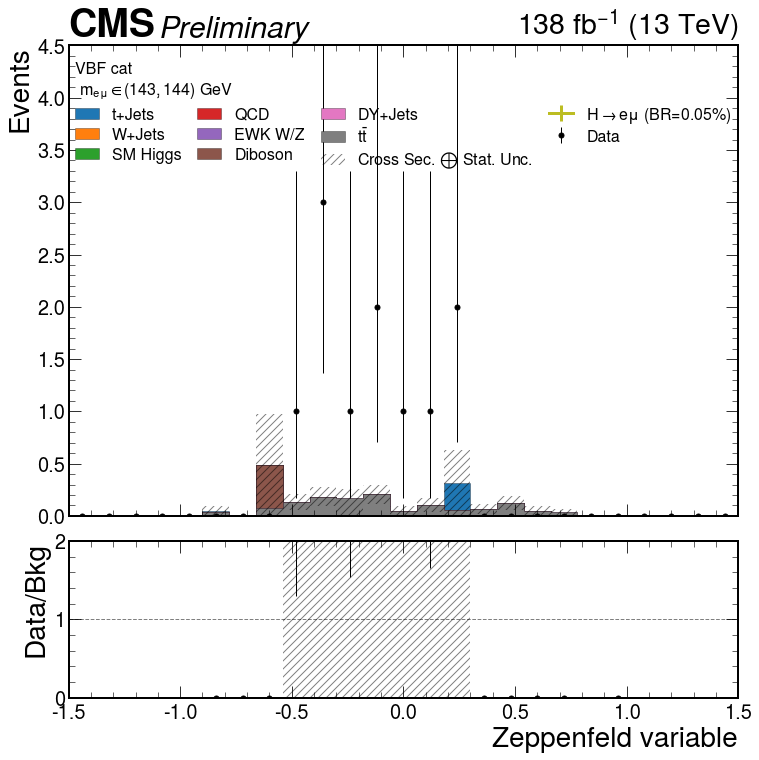

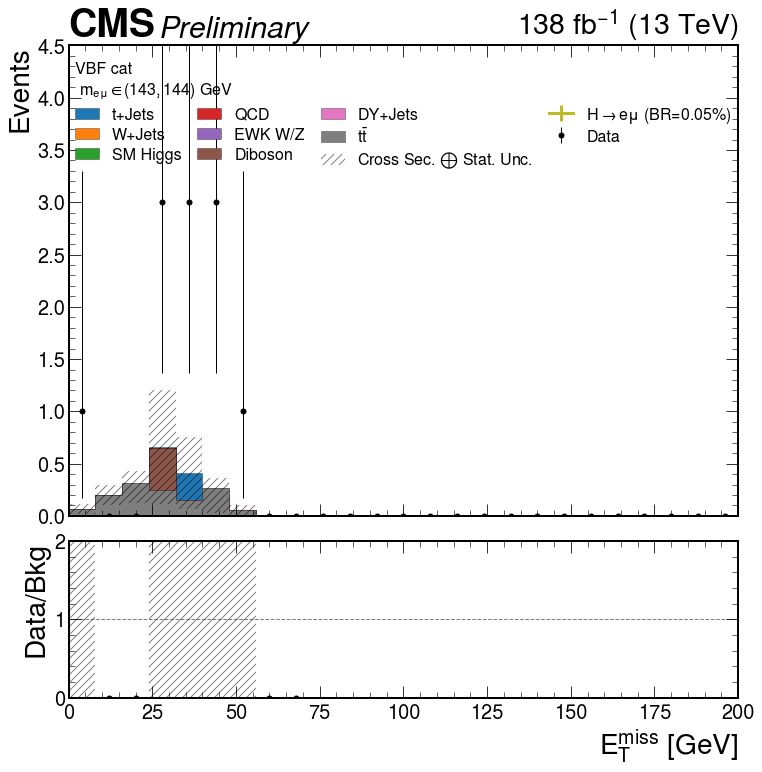

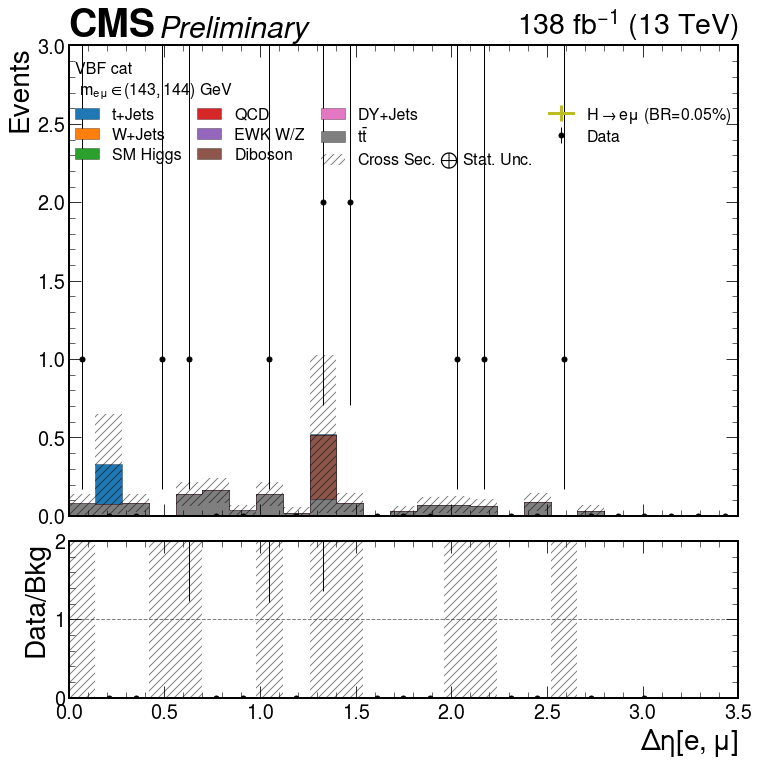

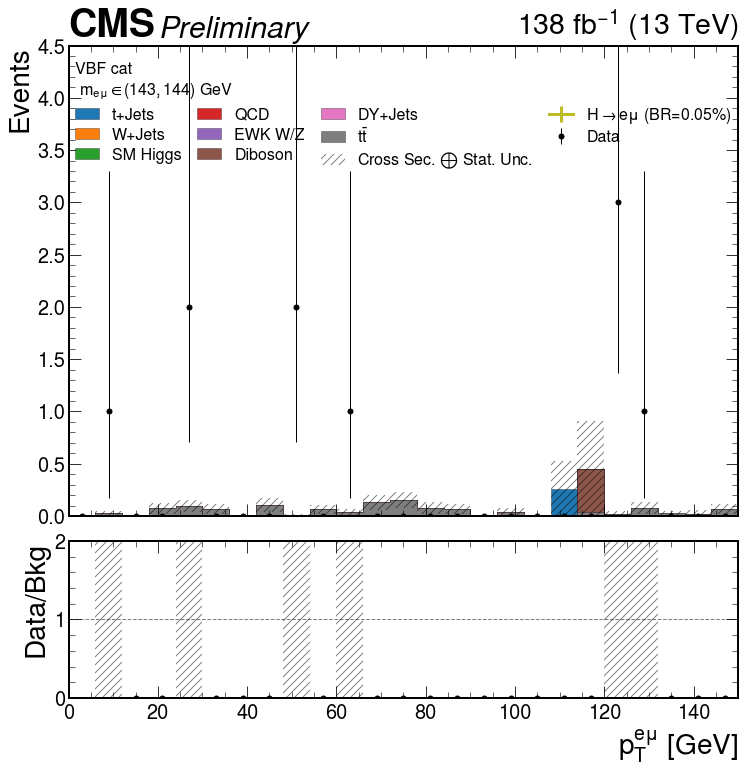

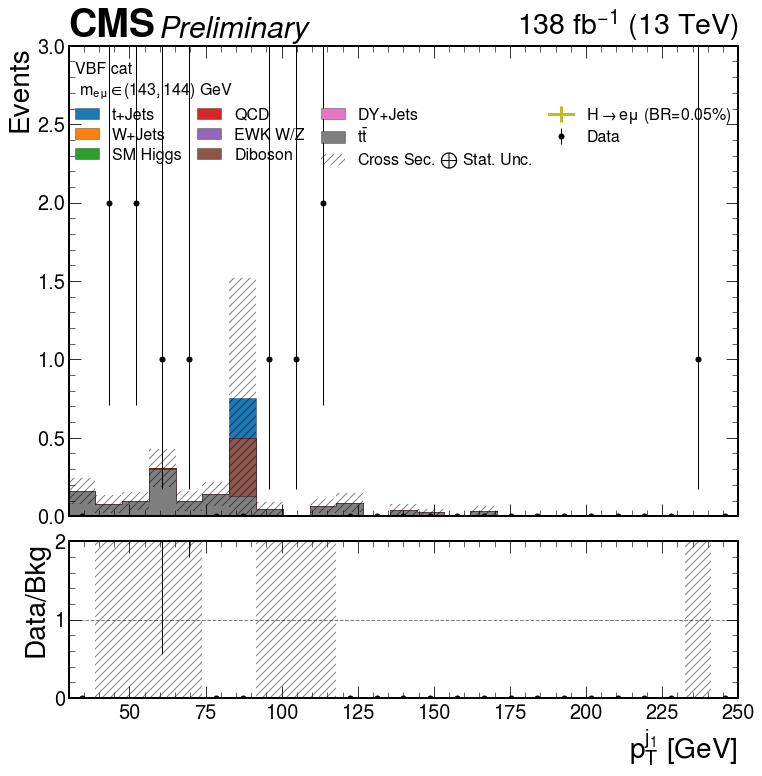

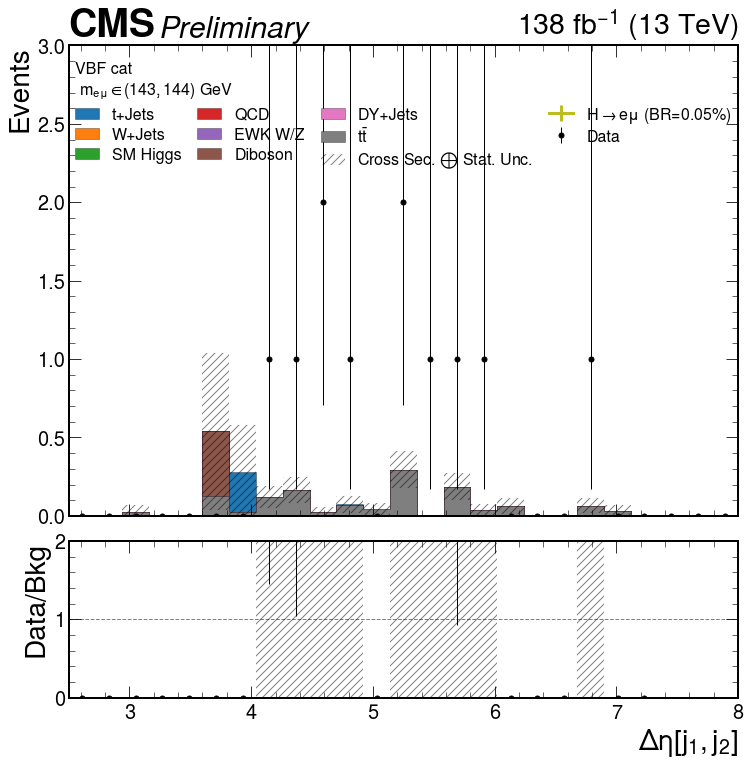

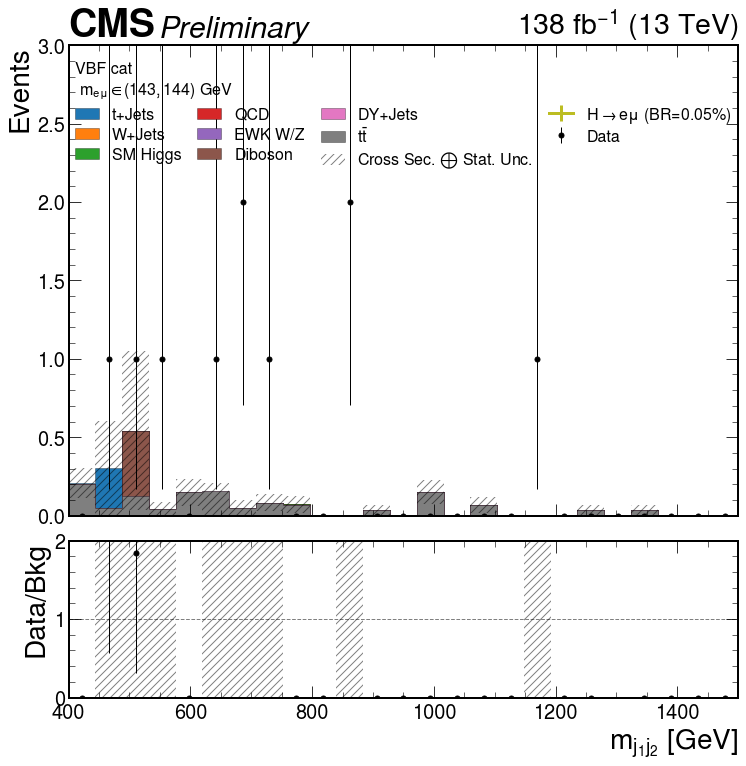

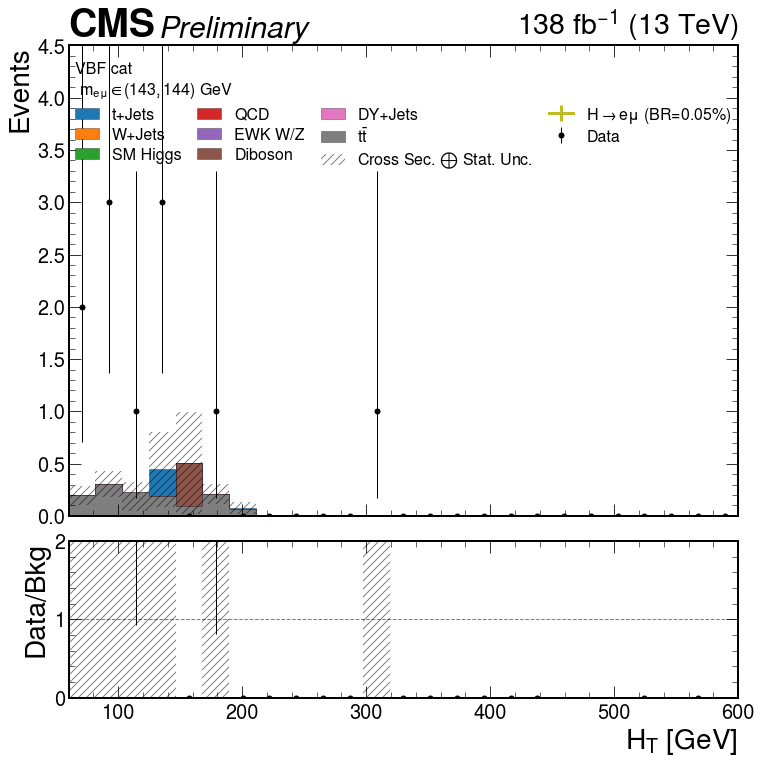

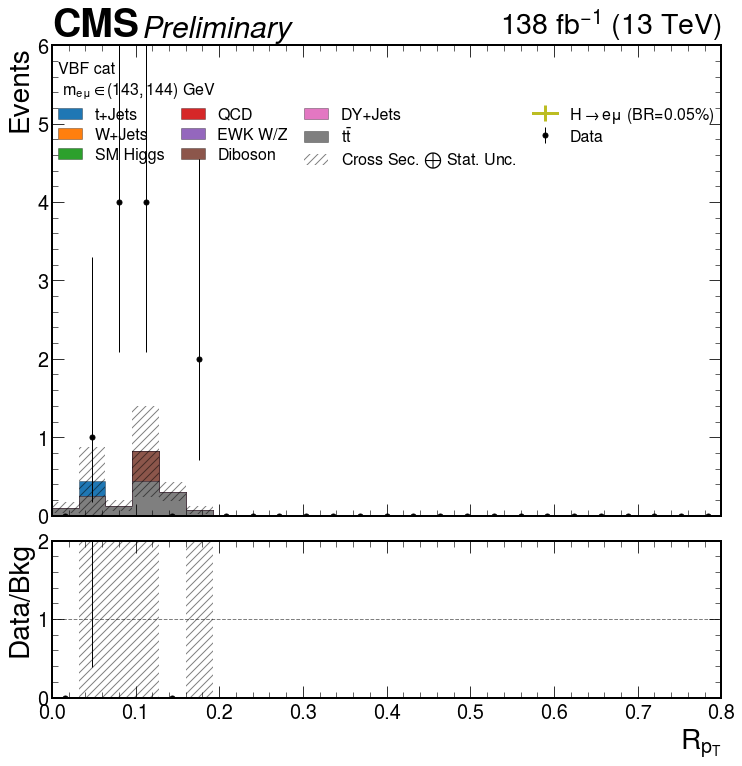

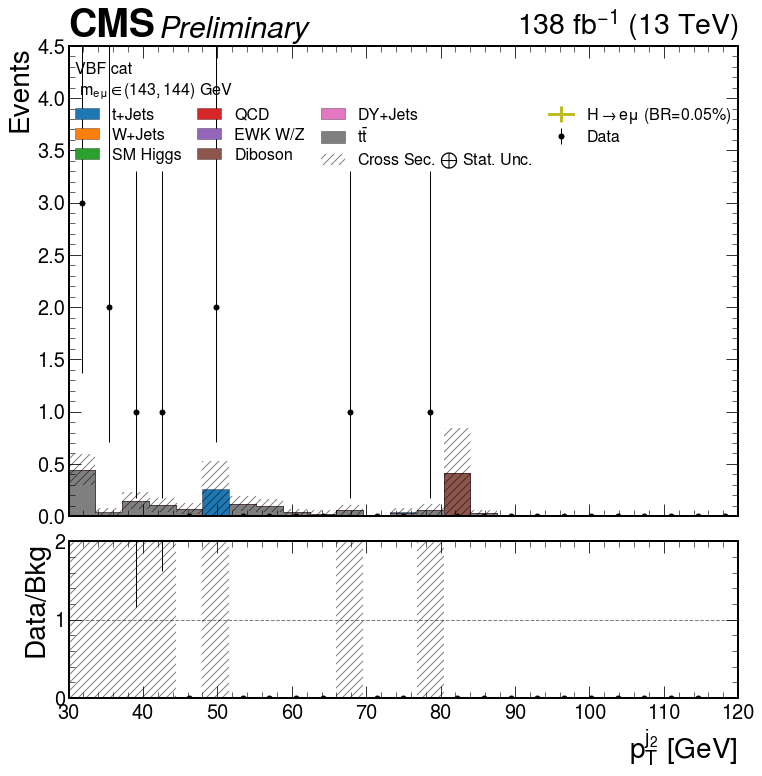

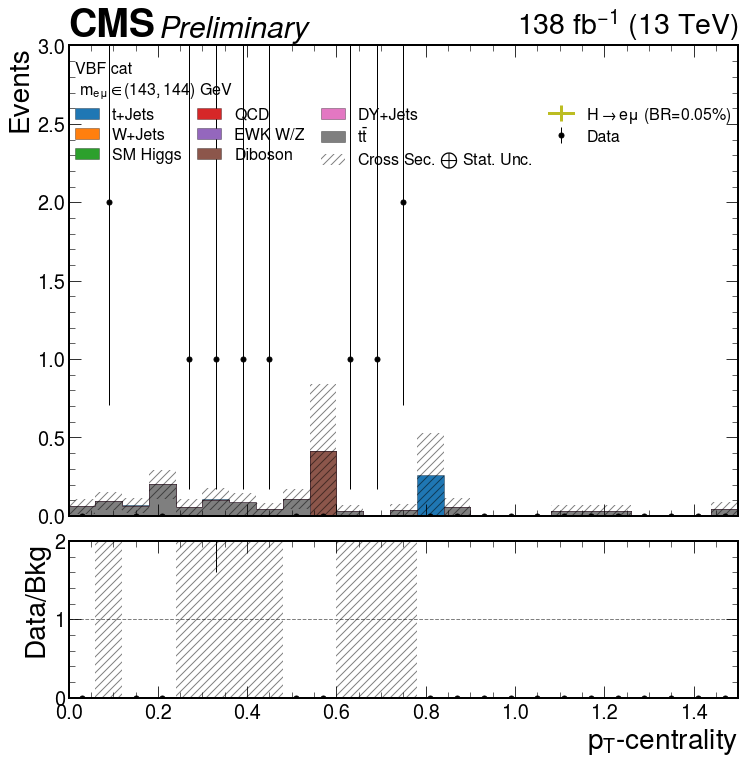

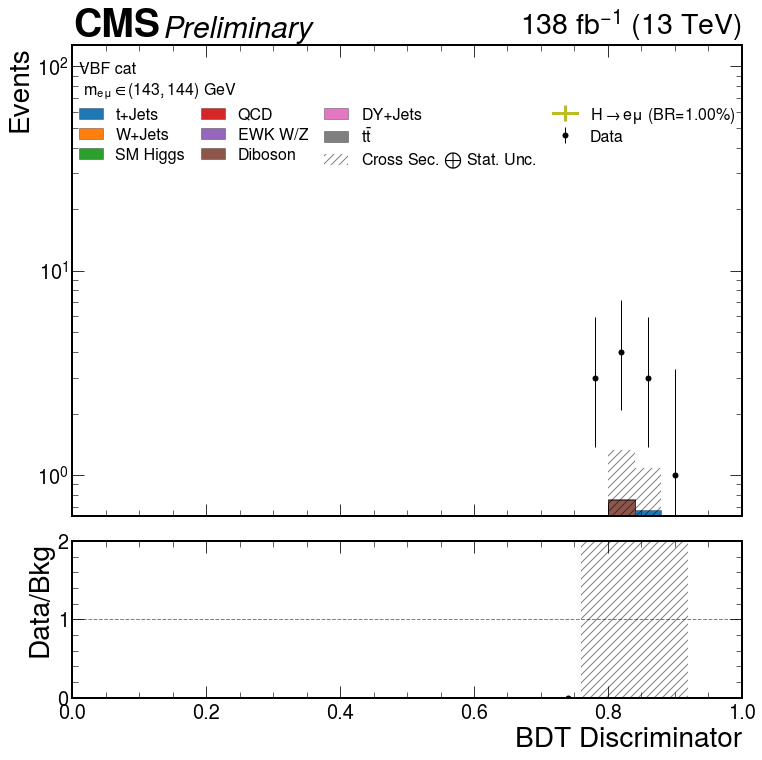

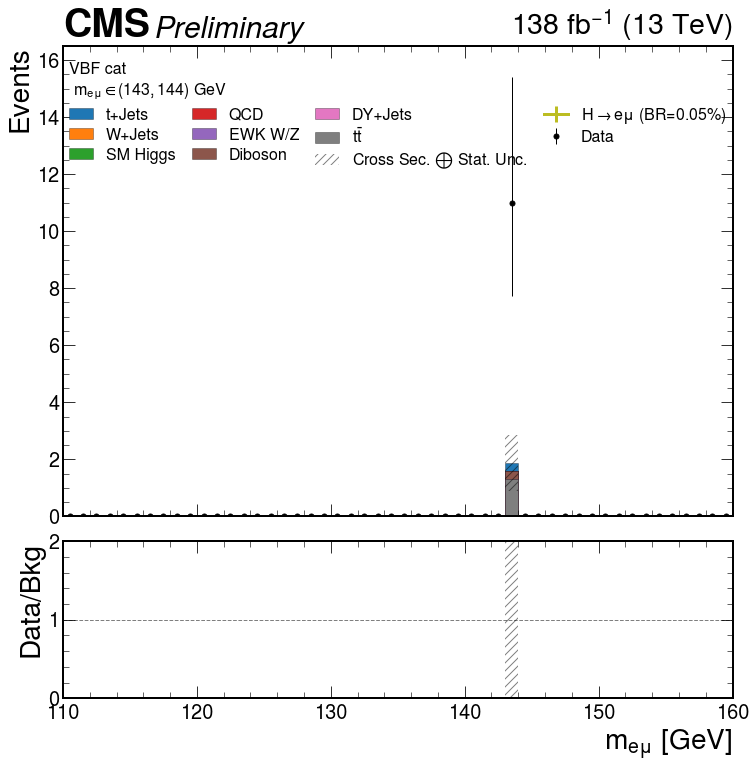

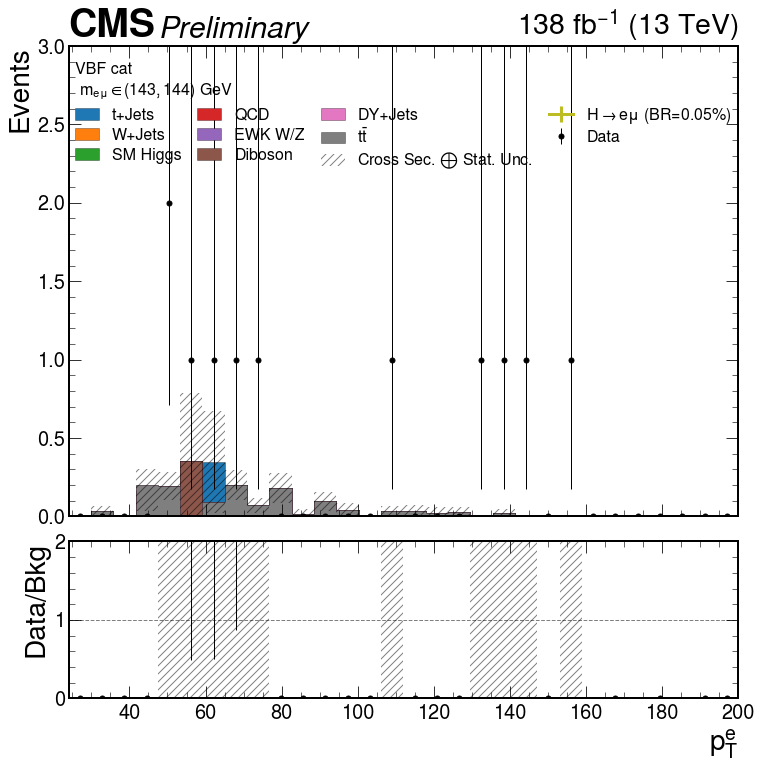

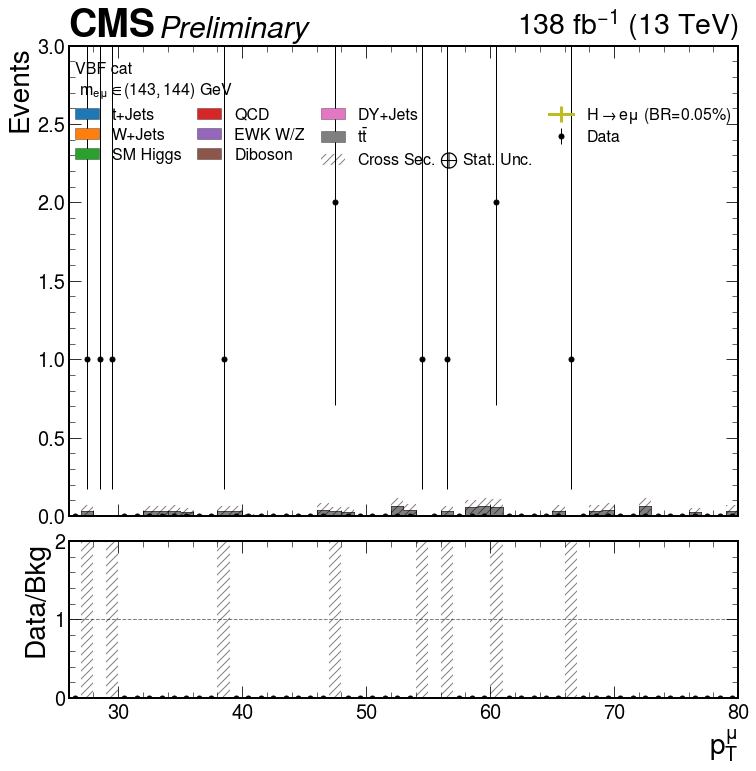

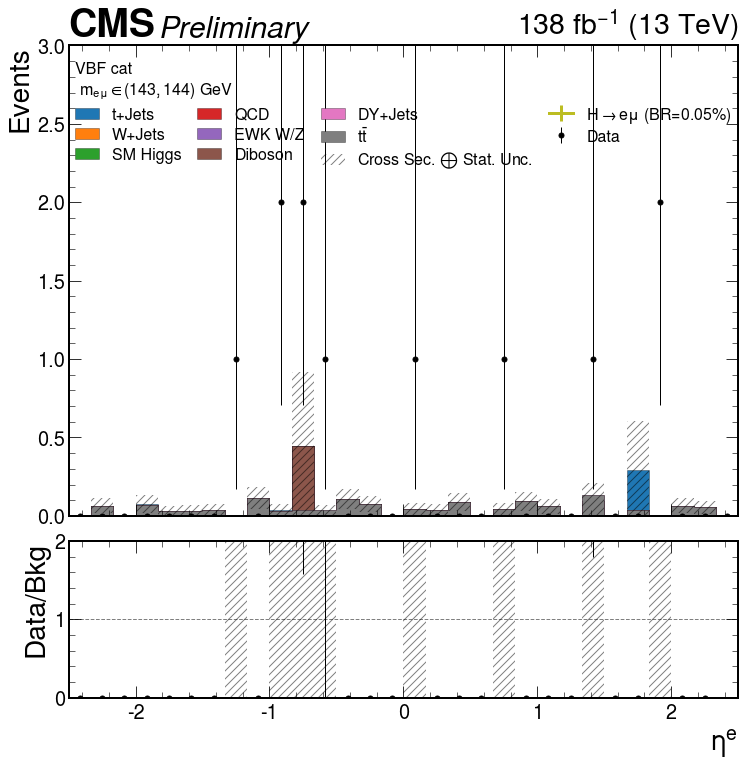

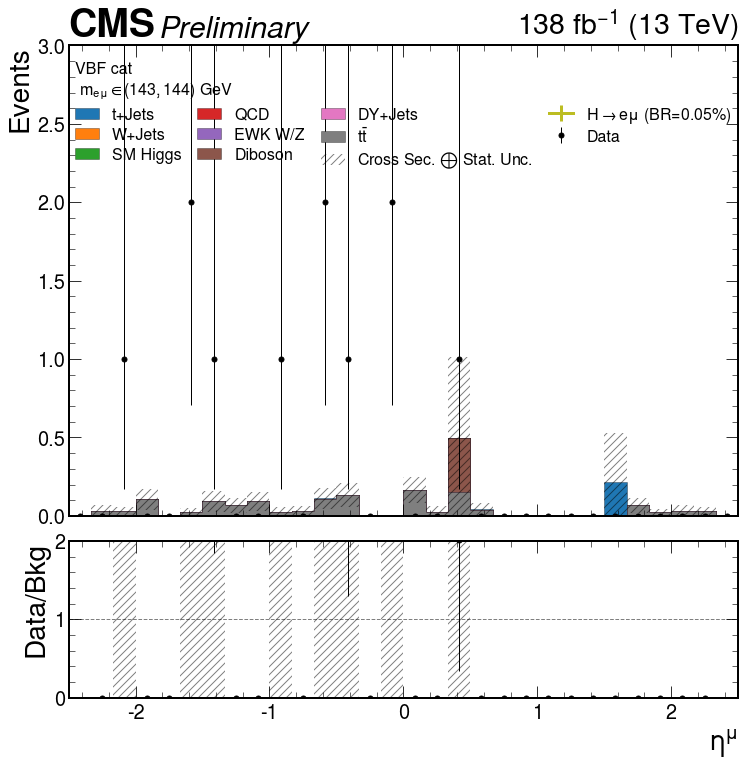

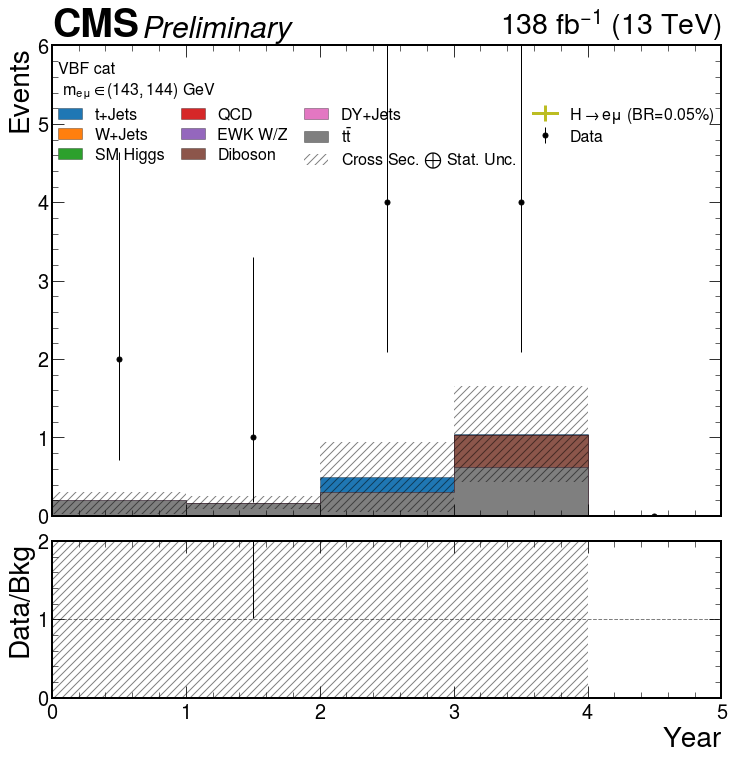

In [136]:
from coffea.util import save, load
from coffea import hist
import math
import mplhep

%matplotlib inline

catlabels = ['VBF cat']
catlabels2 = ['vbf']

list_of_bkg = [r'$t\bar{t}$', 't+Jets', 'SM Higgs', "DY+Jets", "EWK W/Z", "Diboson", "W+Jets"]#, "QCD"]

# dict_of_hist, feature_names, catlabel = dict_of_hists[2], features_lists[2], catlabels[2]
# if True:
for dict_of_hist, feature_names, catlabel, catlabel2 in zip(dict_of_hists, features_lists, catlabels, catlabels2):
    for var_ in feature_names+['mva','e_m_Mass','ept','mpt','eEta','mEta', 'year']:#['mva']: #+feature_names_0jets: #feature_names:
        histo = dict_of_hist[var_] 
        if var_=='mva':
            signal_scale = 1
        else:
            signal_scale = 0.05

        data = histo["Data"] 
        bkg = histo[list_of_bkg]
        signal = histo[r'$H\rightarrow e\mu$ (BR=1%)']
#         qcd = histo['QCD'].copy()
#         qcd_bkg = histo['QCD_bkg']
#         (k, v), = qcd._sumw.items()
#         (k2, v2), = qcd_bkg._sumw.items()
#         qcd._sumw[k] =  qcd._sumw[k] - qcd_bkg._sumw[k2]
#         #qcd._sumw2[k] = qcd._sumw2[k] - qcd_bkg._sumw2[k2]
#         qcd._sumw2[k][qcd._sumw[k]<0] = 0
#         qcd._sumw[k][qcd._sumw[k]<0] = 0
#         bkg.add(qcd)
        
        qcd = histo['QCD'].copy()
        (k, v), = histo['QCD']._sumw.items()
        qcd._sumw2[k][qcd._sumw[k]<0] = 0
        qcd._sumw[k][qcd._sumw[k]<0] = 0
        bkg.add(qcd)

        import matplotlib.pyplot as plt
        plt.style.use(mplhep.style.CMS)

        plt.rcParams.update({
            'font.size': 30,
            'axes.titlesize': 24,
            'axes.labelsize': 28,
            'xtick.labelsize': 20,
            'ytick.labelsize': 20,
        })
        
        plt.rcParams.update({'lines.linewidth': 3})

        fig, (ax, rax) = plt.subplots(
            nrows=2,
            ncols=1,
            figsize=(12,12),
            gridspec_kw={"height_ratios": (3, 1)},
            sharex=True
        )
        fig.subplots_adjust(hspace=.08)

        fill_opts = {
            'edgecolor': (0,0,0,0.3),
            #'alpha': 0.8
        }
        error_opts = {
            'label': 'Stat. Unc.',
            'hatch': '///',
            'facecolor': 'none',
            'edgecolor': (0,0,0,.5),
            'linewidth': 0
        }
        data_err_opts = {
            'linestyle': 'none',
            'marker': '.',
            'markersize': 10.,
            'color': 'k',
            'elinewidth': 1,
        }

        hist.plot1d(
            bkg,
            overlay="dataset",
            ax=ax,
            clear=False,
            stack=True,
            line_opts=None,
            fill_opts=fill_opts,
            #error_opts=error_opts
        )

        hist.plot1d(
            signal,
            overlay="dataset",
            ax=ax,
            clear=False,
            line_opts={'linewidth': 3.0},
            error_opts={}
        )
        
        hist.plot1d(
            data,
            overlay="dataset",
            ax=ax,
            clear=False,
            error_opts=data_err_opts
        )
        
        v1 = np.zeros(len(bkg["t+Jets"].to_hist().axes.edges[1][0])+2)
        v2 = np.zeros(len(bkg["t+Jets"].to_hist().axes.edges[1][0])+2)
        (k, v3), = data._sumw.items()
        for listofbkg in list_of_bkg+['QCD']:
            (k, v), = bkg[listofbkg]._sumw.items()
            (k_2, v_2), = bkg[listofbkg]._sumw2.items()
            v2+=v
            v1+=np.sqrt(v_2)
            #v1+=v*0.02
            if listofbkg==r'$t\bar{t}$':
                v1+=v*0.06
            if listofbkg=='t+Jets':
                v1+=v*0.05
            elif listofbkg=="DY+Jets":
                v1+=v*0.04
            elif listofbkg=="Diboson":
                v1+=v*0.05
            elif listofbkg=="EWK W/Z":
                v1+=v*0.04
            elif listofbkg=="W+Jets":
                v1+=v*0.10
            elif listofbkg=="QCD":
                v1+=v*0.30

        ax.stairs(
            edges=bkg["t+Jets"].to_hist().axes.edges[1][0],
            baseline=v2[1:-2] - v1[1:-2],
            values=v2[1:-2] + v1[1:-2],
            hatch="///",
            label=r"Cross Sec. $\bigoplus$ Stat. Unc.",
            facecolor="none",
            linewidth=0,
            edgecolor=(0,0,0,.5)
        )

        ax.autoscale(axis='x', tight=True)
        if var_=='mva':
            ax.set_yscale('log')
            if catlabel=='VBF cat':
                ax.set_ylim(10**(math.log10(min([i for i in data.sum("dataset").values()[()] if i!=0]))-.2), 10**(math.log10(max(data.sum("dataset").values()[()]))+1.5))
            else:
                 ax.set_ylim(10**(math.log10(min([i for i in data.sum("dataset").values()[()] if i!=0]))-1), 10**(math.log10(max(data.sum("dataset").values()[()]))+1.5))
        else:
            ax.set_ylim(0, max(data.sum("dataset").values()[()])*1.5)
#        ax.set_ylim(0, max(data.sum("dataset").values()[()])*2)
        ax.set_xlabel(None)

        label_list = []
        for t in ax.get_legend_handles_labels():
            label_list.append(t)
        new_label_list = []
        for txt in label_list[1]:
            if txt[0] == '0':
                txt = str(txt)[:4]
            if txt==r'$H\rightarrow e\mu$ (BR=1%)':
                new_label_list.append(r'$H\rightarrow e\mu$ (BR={:.2f}%)'.format(signal_scale))
            else:
                new_label_list.append(txt)
        label_list[1] = new_label_list
        leg = ax.legend(title_fontsize=16, title=catlabel+' \n $m_{e\mu} \in (143, 144)\ GeV$', fontsize=16, ncol=4, columnspacing=1, labelspacing=0.25, loc=9, handles=label_list[0], labels=label_list[1])
        leg._legend_box.align = "left"
         
#         ax.annotate('GG cat, 0 jet \nData/Bkg: $m_{e\mu} \in (110, 115) \cup (135, 160)\ GeV$\nSignal: $m_{e\mu} \in (110, 160)\ GeV$', xy=(0.05,0.05), xycoords='axes fraction',
#              fontsize=14, weight='bold')
        hist.plotratio(
            num=data.sum("dataset"),
            denom=bkg.sum("dataset"),
            ax=rax,
            error_opts=data_err_opts,
            #denom_fill_opts={},
            guide_opts={},
            unc='num'
        )
        rax.stairs(
            edges=bkg["t+Jets"].to_hist().axes.edges[1][0],
            baseline=1 - v3[1:-2]*v1[1:-2]/(v2[1:-2]*v2[1:-2]),
            values=1 +  v3[1:-2]*v1[1:-2]/(v2[1:-2]*v2[1:-2]),
            hatch="///",
            label="Stat. unc.",
            facecolor="none",
            linewidth=0,
            edgecolor=(0,0,0,.5)
        )

    #         from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
    #         rax.xaxis.set_minor_locator(AutoMinorLocator()) #rax.minorticks_on()
        if catlabel=='VBF cat':
            rax.set_ylim(0, 2)
        else:
            rax.set_ylim(0.5, 1.5)
        rax.set_ylabel("Data/Bkg", loc='center')

        lumi = mplhep.cms.label(ax=ax, lumi=138, label="Preliminary", data=1)
        fig.savefig(f'plots/vbfcat0_143_144/{var_}.png')